
# Avacado Project

### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

### Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Columns in the dataset:

- Date - The date of the observation

- AveragePrice - the average price of a single avocado

- type - conventional or organic

- year - the year

- Region - the city or region of the observation

- Total Volume - Total number of avocados sold

- 4046 - Total number of avocados with PLU 4046 sold

- 4225 - Total number of avocados with PLU 4225 sold

- 4770 - Total number of avocados with PLU 4770 sold


Task :- 

To make a model that can consider the data provided and predict the Average Price.



### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import zscore
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Renaming & Calling the dataframe

In [2]:
df=pd.read_csv('avocado_data.csv')
df 

,Serial no,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Renaming the columns with numeric names

In [3]:
df= df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass", "4770" : "XLarge Hass"})
df=df.drop('Serial no',axis=1)
df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Extracting the dataset informations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   Small Hass    18249 non-null  float64
 4   Large Hass    18249 non-null  float64
 5   XLarge Hass   18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


- The dataframe has 14 no of coumns from 0 to 14 originally.
- The dataframe has data types as object and float.
- The dataframe has non-null values.
- The dataframe has occupied 1.8+ MB of space on the system it refers.

### Checking the data shape

In [5]:
df.shape

(18249, 13)

- The dataframe has 18249 number of rows and 14 number of columns originally.

### Obtaining the column names inolved in our dataset.

In [6]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small Hass', 'Large Hass',
       'XLarge Hass', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

### Checking the null values , if there's any

In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
Small Hass      0
Large Hass      0
XLarge Hass     0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- There are no null-values in the dataset.

### Checking the no of values per column

In [8]:
df.notnull().sum()

Date            18249
AveragePrice    18249
Total Volume    18249
Small Hass      18249
Large Hass      18249
XLarge Hass     18249
Total Bags      18249
Small Bags      18249
Large Bags      18249
XLarge Bags     18249
type            18249
year            18249
region          18249
dtype: int64

- There are total 18249 values in each column,the dataset is distributed uniformly.

### Checking the null-values through visualisation heatmap

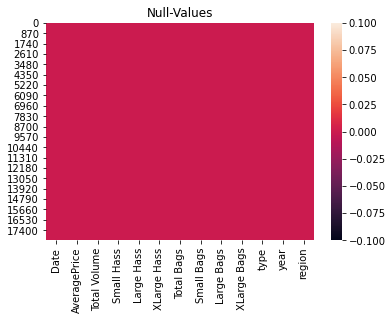

In [9]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

- The graph indicates there are no null-values in the entire dataset.

 ### Checking duplicate values

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Length: 18249, dtype: bool

### Correcting date format

In [11]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


### Checking unique values in categorical data columns

In [12]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [13]:
df.year.unique()

array([2015, 2016, 2017, 2018])

In [14]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [15]:
df.Month.unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [16]:
df['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

### Average price 

In [17]:
print(df["AveragePrice"].mean())
print(df["AveragePrice"].min())
print(df["AveragePrice"].max())

1.4059784097758825
0.44
3.25


In [18]:
df[df["AveragePrice"] > 3.0]

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
13037,2016-10-02,3.03,3714.71,296.71,2699.80,0.00,718.20,718.20,0.00,0.0,organic,2016,LasVegas,10
14124,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.0,organic,2016,SanFrancisco,11
14125,2016-10-30,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.0,organic,2016,SanFrancisco,10
16055,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.0,organic,2017,MiamiFtLauderdale,3
16720,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.0,organic,2017,RaleighGreensboro,8
17428,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.0,organic,2017,Tampa,4


- There were 5 region where Organic Avocados were sold expensive in comparison to the average price for over-all countries.
- Those 5 regions are - LasVegas ,SanFrancisco, Miami FT Lauderdale , Raleigh Greensboro and Tampa.

## Graphical Representation of the dataframe

In [19]:
df_visualization_nominal=df[['type','year','region','Month']].copy()
df_visualization_nominal

,type,year,region,Month
0,conventional,2015,Albany,12
1,conventional,2015,Albany,12
2,conventional,2015,Albany,12
3,conventional,2015,Albany,12
4,conventional,2015,Albany,11
...,...,...,...,...
18244,organic,2018,WestTexNewMexico,2
18245,organic,2018,WestTexNewMexico,1
18246,organic,2018,WestTexNewMexico,1
18247,organic,2018,WestTexNewMexico,1


conventional    9126
organic         9123
Name: type, dtype: int64


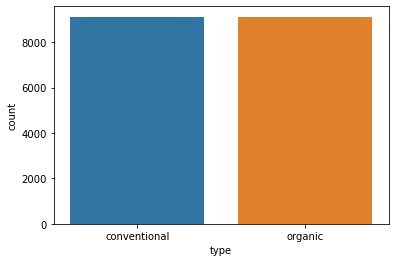

In [20]:
ax=sns.countplot(x='type',data=df_visualization_nominal)
print(df_visualization_nominal['type'].value_counts())

- the graph shows there equal no of both types of avocadoes.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


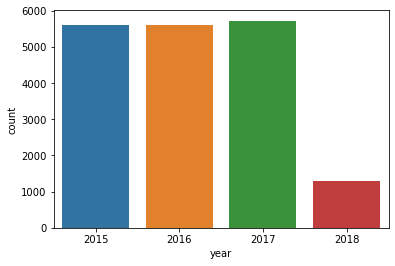

In [21]:
ax=sns.countplot(x='year',data=df_visualization_nominal)
print(df_visualization_nominal['year'].value_counts())

- the graph shows that in year 2018 sale of avocadoes was really low.

CincinnatiDayton       338
Roanoke                338
Boise                  338
NewYork                338
GreatLakes             338
GrandRapids            338
Jacksonville           338
California             338
Northeast              338
Louisville             338
RaleighGreensboro      338
Tampa                  338
LosAngeles             338
Chicago                338
NorthernNewEngland     338
DallasFtWorth          338
Sacramento             338
PhoenixTucson          338
Columbus               338
Midsouth               338
LasVegas               338
Philadelphia           338
Charlotte              338
Nashville              338
Atlanta                338
West                   338
SouthCentral           338
Indianapolis           338
HartfordSpringfield    338
Syracuse               338
Seattle                338
Houston                338
BaltimoreWashington    338
Southeast              338
Detroit                338
SanDiego               338
Portland               338
R

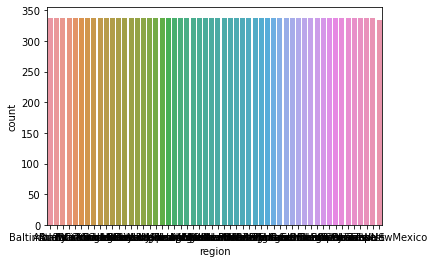

In [22]:
ax=sns.countplot(x='region',data=df_visualization_nominal)
print(df_visualization_nominal['region'].value_counts())

- there are equal no of categories from each country.

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


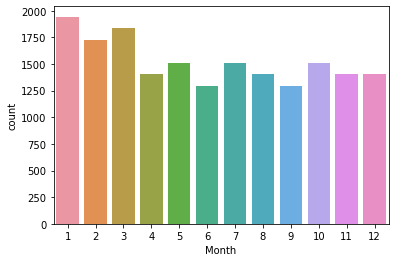

In [23]:
ax=sns.countplot(x='Month',data=df_visualization_nominal)
print(df_visualization_nominal['Month'].value_counts())

- the graph shows the rise and fall in sale of avocadoes with the respect to month .

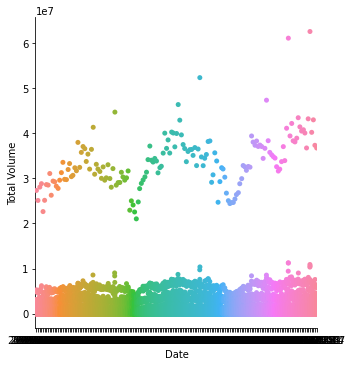

In [24]:
sns.catplot(x='Date',y='Total Volume',data=df)

- The column date does not affect the target variable.

In [25]:
df.drop(columns=["Date"],inplace=True)

### Dataframe for Visualisation for the continous data

In [26]:
df_visualisation_continous=df[['AveragePrice','Total Volume','Small Hass','Large Hass','XLarge Hass','Total Bags','Small Bags','Large Bags','XLarge Bags']].copy()
df_visualisation_continous

,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


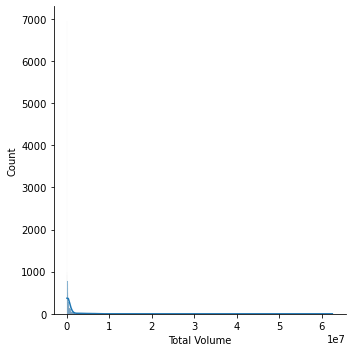

In [27]:
sns.displot(df_visualisation_continous['Total Volume'],kde=True)

- The volume decreases with time.

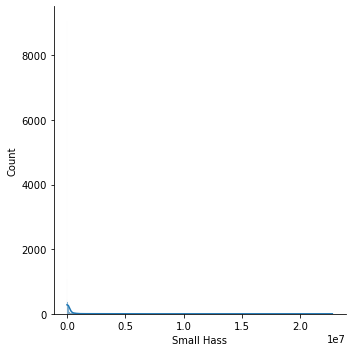

In [28]:
sns.displot(df_visualisation_continous['Small Hass'],kde=True) 

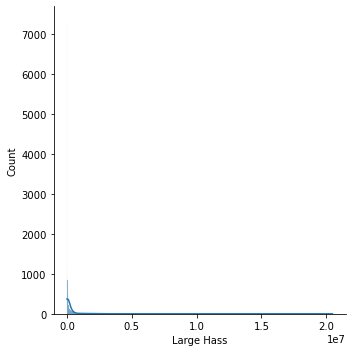

In [29]:
sns.displot(df_visualisation_continous['Large Hass'],kde=True)

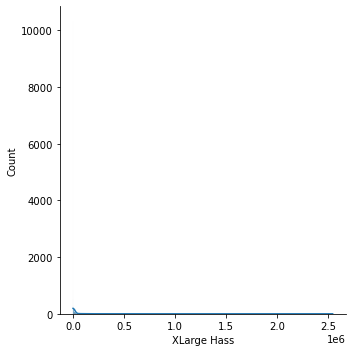

In [30]:
sns.displot(df_visualisation_continous['XLarge Hass'],kde=True)

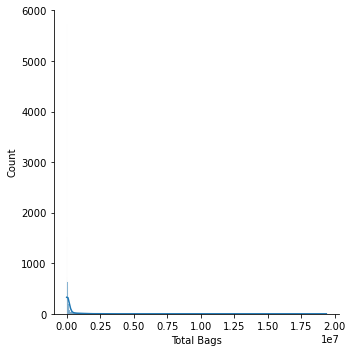

In [31]:
sns.displot(df_visualisation_continous['Total Bags'],kde=True)

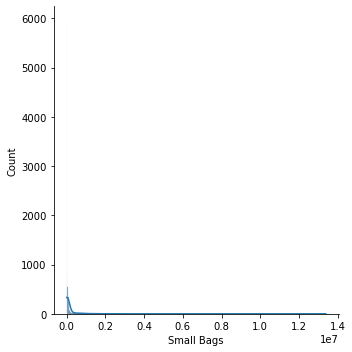

In [32]:
sns.displot(df_visualisation_continous['Small Bags'],kde=True)

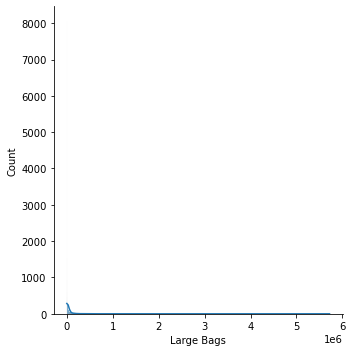

In [33]:
sns.displot(df_visualisation_continous['Large Bags'],kde=True)

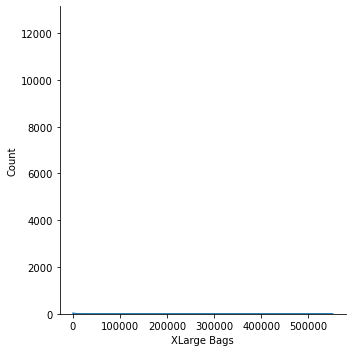

In [34]:
sns.displot(df_visualisation_continous['XLarge Bags'],kde=True)

### Graph for the Target Variable - 'Average Price' 

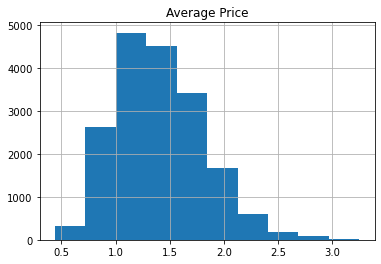

In [35]:
df['AveragePrice'].hist(grid=True) # analysis on single attribute of the dataset
plt.title('Average Price')
plt.show()

- The average price for the avocadoes is a continous variable in nature.Hence, it's a regression type machine learning problem.
- The graph represents that :-
  - Majority of the avacado's price in most of the countries is somewhere in range 1.0 to 1.7.
  - A very low no of countries offer the avocados at great low price in comparion to most of the countries.
  - Some countries offer avocados at higher than average price of most of the countries.

## Encoding the Dataframe :

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [38]:
le=preprocessing.LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['region']=le.fit_transform(df['region'])
#df['Date']=le.fit_transform(df['Date'])
df

,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


## Description of the dataframe

In [39]:
df.describe()

,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000


 The dataframe description gives -
- The total count of values in each columns i.e 14 .
- The mean and standard deviation values of each columns.
- The quartile values for 25the , 50th and 75th persentiles.
- The maximum values for each columns as well.

### Graph for the description

<AxesSubplot:>

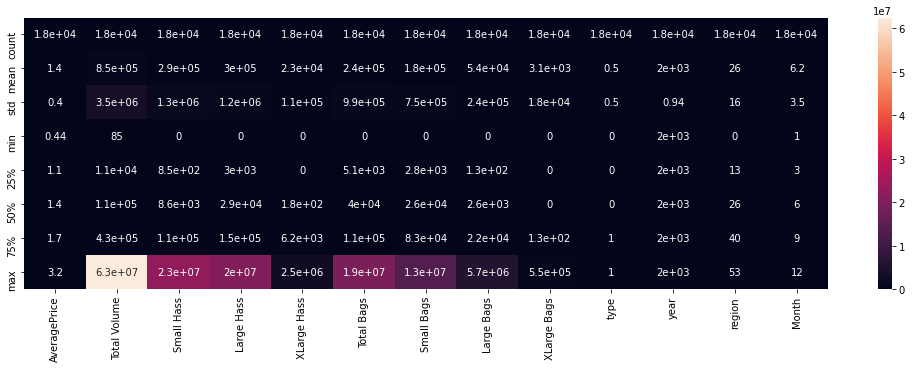

In [41]:
plt.figure(figsize=(18,5))
sns.heatmap(df.describe(),annot=True)

## Correlation of the columns with the target variables :-

In [42]:
df.corr()

,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689
Small Hass,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803
Large Hass,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108
XLarge Hass,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085


<AxesSubplot:>

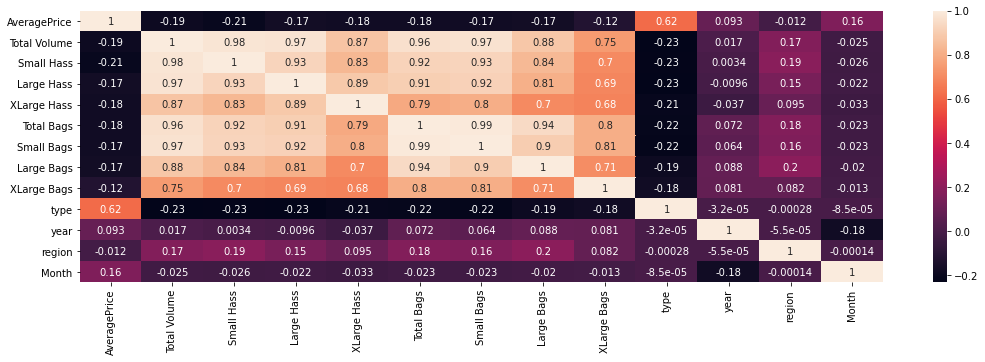

In [43]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),annot=True)

### Checking the columns which are positivly or negatively related to target variable :-

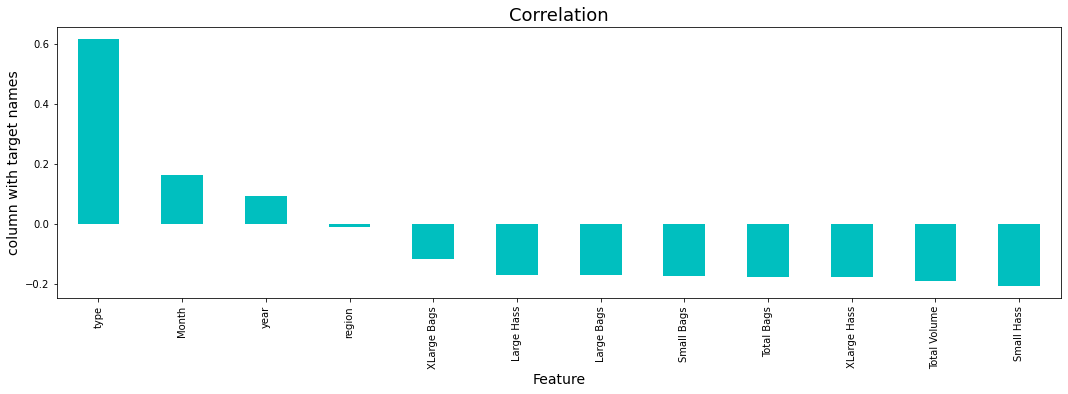

In [44]:
plt.figure(figsize=(18,5))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Variables above 0 are positvely related to the target variable.
- Variables below 0 are negatively related to the target variable.

### Checking the skewness of the data

In [45]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
Small Hass       8.648220
Large Hass       8.942466
XLarge Hass     10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
dtype: float64

keeping +/- 0.5 as the range for skeness.

In [46]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [47]:
x.head()

,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


In [48]:
x.shape

(18249, 12)

In [49]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [50]:
y.shape

(18249,)

### Handling the skewness

In [51]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

Total Volume    0.011171
Small Hass     -0.022679
Large Hass     -0.017740
XLarge Hass     0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
region         -0.261443
Month          -0.146584
dtype: float64

keeping +/- 0.5 as the range for skeness.

In [52]:
df.dtypes

AveragePrice    float64
Total Volume    float64
Small Hass      float64
Large Hass      float64
XLarge Hass     float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
Month             int64
dtype: object

### Box-plot  graph for the variables :-

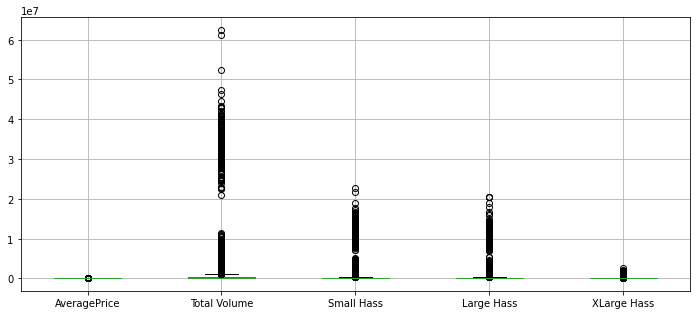

In [53]:
# plotting boxplots for first 5 columns
df.iloc[:,0:5].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

- A huge number of outliers present can be seen in Total volume , Small Hass also some in Avergae Price.

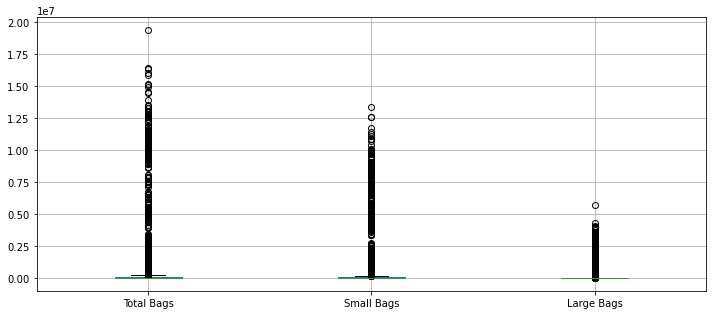

In [54]:
# plotting boxplots for first 5 columns
df.iloc[:,5:8].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

- A huge number of outliers present can be seen in Large Hass , XLarge Hass and Total Bags.

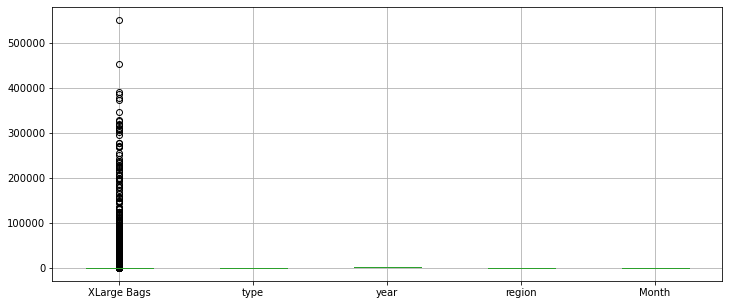

In [55]:
# plotting boxplots for first 5 columns
df.iloc[:,8:16].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

- A huge number of outliers present can be seen in Small Bags , Large Bags and XLarge Bags.

In [56]:
df.shape

(18249, 13)

### Handling the outliers :-

In [57]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

In [58]:
df # improved dataframe

,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


## Scaling the data with Min-Max Scaler

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
mms=MinMaxScaler()
lr=LinearRegression()

In [60]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is :{r2_score(y_test,pred_test)} ')
    print('\n')        

At random state 0,the training accuracy is:0.44445046512480246
At random state 0,the testing accuracy is :0.44752216243320453 


At random state 1,the training accuracy is:0.44250400502765885
At random state 1,the testing accuracy is :0.45494108165713 


At random state 2,the training accuracy is:0.4487203153557062
At random state 2,the testing accuracy is :0.4328942612095048 


At random state 3,the training accuracy is:0.44506648672631755
At random state 3,the testing accuracy is :0.44588908491044554 


At random state 4,the training accuracy is:0.4480532586382491
At random state 4,the testing accuracy is :0.4351856659258466 


At random state 5,the training accuracy is:0.4455538045010634
At random state 5,the testing accuracy is :0.4432850086669855 


At random state 6,the training accuracy is:0.4439639820063246
At random state 6,the testing accuracy is :0.4499442107975923 


At random state 7,the training accuracy is:0.44499060689907943
At random state 7,the testing accuracy is :0.

At random state 71,the training accuracy is:0.44212424184100607
At random state 71,the testing accuracy is :0.4562515521503334 


At random state 72,the training accuracy is:0.4486608871364297
At random state 72,the testing accuracy is :0.4329084995862451 


At random state 73,the training accuracy is:0.44464652728905385
At random state 73,the testing accuracy is :0.4472386292482434 


At random state 74,the training accuracy is:0.44450534349543513
At random state 74,the testing accuracy is :0.44773915405491793 


At random state 75,the training accuracy is:0.4499129993911024
At random state 75,the testing accuracy is :0.42897354176041314 


At random state 76,the training accuracy is:0.442758655571175
At random state 76,the testing accuracy is :0.4541702405266217 


At random state 77,the training accuracy is:0.43998257692482645
At random state 77,the testing accuracy is :0.4627026091549755 


At random state 78,the training accuracy is:0.4444645138112594
At random state 78,the testin

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=21)

In [67]:
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
pred_test=lr.predict(x_test)

In [64]:
print(r2_score(y_test,pred_test))

0.4361354544277931


In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('error :')

print('Mean absolute error :',mean_absolute_error(y_test,pred_test))
print('Mean squared error :',mean_squared_error(y_test,pred_test))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('r2_score value :',r2_score(y_test,pred_test))


error :
Mean absolute error : 0.2312116620296605
Mean squared error : 0.08837431672442565
Root Mean Squared Error :  0.2972781807069359
r2_score value : 0.4361354544277931


## Testing - Linear Regression with Lasso and Ridge models¶


In [69]:
from sklearn.linear_model import Lasso,Ridge

In [70]:
ls=Lasso(alpha=0.0001)
# ls=lasso(alpha=0.1) --> default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.4476413864998705

In [71]:
Rg=Ridge(alpha=.001)
Rg.fit(x_train,y_train)
Rg.score(x_train,y_train)

0.4477984486986172

## Cross Validation Score for each model¶

In [72]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)
print('The cross validation score for the Linear Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.3000567641285938.')

The cross validation score for the Linear Regression model is : -13.282810162555919
The difference between accuracy and crossvalidation score is :0.3000567641285938.


In [73]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ls,x,y,cv=5)
print('The cross validation score for the Lasso Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.3777567641285938.')

The cross validation score for the Lasso Regression model is : 0.06093927677794708
The difference between accuracy and crossvalidation score is :0.3777567641285938.


In [74]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(Rg,x,y,cv=5)
print('The cross validation score for the Ridge Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.8830430523800308.')

The cross validation score for the Ridge Regression model is : -14.809912980677307
The difference between accuracy and crossvalidation score is :0.8830430523800308.


- The best model will be Linear Regression.

## Saving the best model

In [75]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(lr,open('pickledtcfile','wb'))

In [76]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)

array([1.56947617, 1.15052448, 1.1409936 , ..., 1.14913223, 1.29770671,
       1.65036738])